Cargar, limpiar y filtrar el CSV



In [1]:
import pandas as pd
import numpy as np



In [2]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving listings_Sydney.csv to listings_Sydney.csv


{'listings_Sydney.csv': b'host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms_text,beds,price,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month\r\n100%,90%,10,2,1 bath,1,$183.00,365,100,7,5,5,5,4.29,5,4.86,5,1.91\r\n80%,100%,4,4,1 bath,,,7,0,0,,,,,,,,\r\n100%,93%,59,2,1 bath,,,365,0,0,,,,,,,,\r\nN/A,N/A,1,2,1 bath,1,$395.00,365,302,2,5,5,5,5,5,5,5,0.07\r\n96%,100%,73,2,1 bath,1,$250.00,365,243,3,5,5,5,5,5,5,4.67,0.32\r\n100%,100%,1,4,1 bath,3,$170.00,365,90,22,4.82,4.82,4.59,4.91,4.86,5,4.86,2.59\r\n50%,0%,1,6,1.5 baths,4,$240.00,365,350,0,,,,,,,,\r\n100%,93%,87,2,1 bath,1,$120.00,89,283,45,4.29,4.56,4.2,4.11,4.76,4.87,4.27,0.38\r\n25%,14%,12,2,2 baths,1,$80.00,365,82,0,,,,,,,,\r\nN/A,N/A,3,2,1 bath,2,$300.00,90,268,0,,,,,,,,\r\nN/A,N/A,1,4,1 bath,2,$500.00,14,44,0,,,,,,,

In [3]:
# Cargar el archivo CSV de extracción de características
file_path = "listings_Sydney.csv"
df = pd.read_csv(file_path)

In [4]:
# Convertir columnas que representan porcentajes a formato numérico
df["host_response_rate"] = df["host_response_rate"].str.rstrip("%").astype(float)
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float)

In [5]:
# Convertir la columna de precio eliminando el símbolo "$" y las comas
df["price"] = df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [6]:
# Seleccionar únicamente las columnas numéricas
df_num = df.select_dtypes(include=[np.number]).copy()

In [7]:
# Eliminar filas que contengan valores nulos
df_num = df_num.dropna()

In [10]:
# Guardar el CSV con los datos filtrados
df_num.to_csv("filtered_data.csv", index=False)



Aplicar la Regla de Sturges para determinar el número de bins

In [9]:
# Función para calcular el número de bins usando la Regla de Sturges
def sturges_rule(n):
    return int(np.ceil(1 + np.log2(n)))



In [11]:
# Calcular el número de bins para el dataset filtrado
num_bins = sturges_rule(len(df_num))
print("Número de bins según la Regla de Sturges:", num_bins)


Número de bins según la Regla de Sturges: 15


Graficar las frecuencias de las variables numéricas

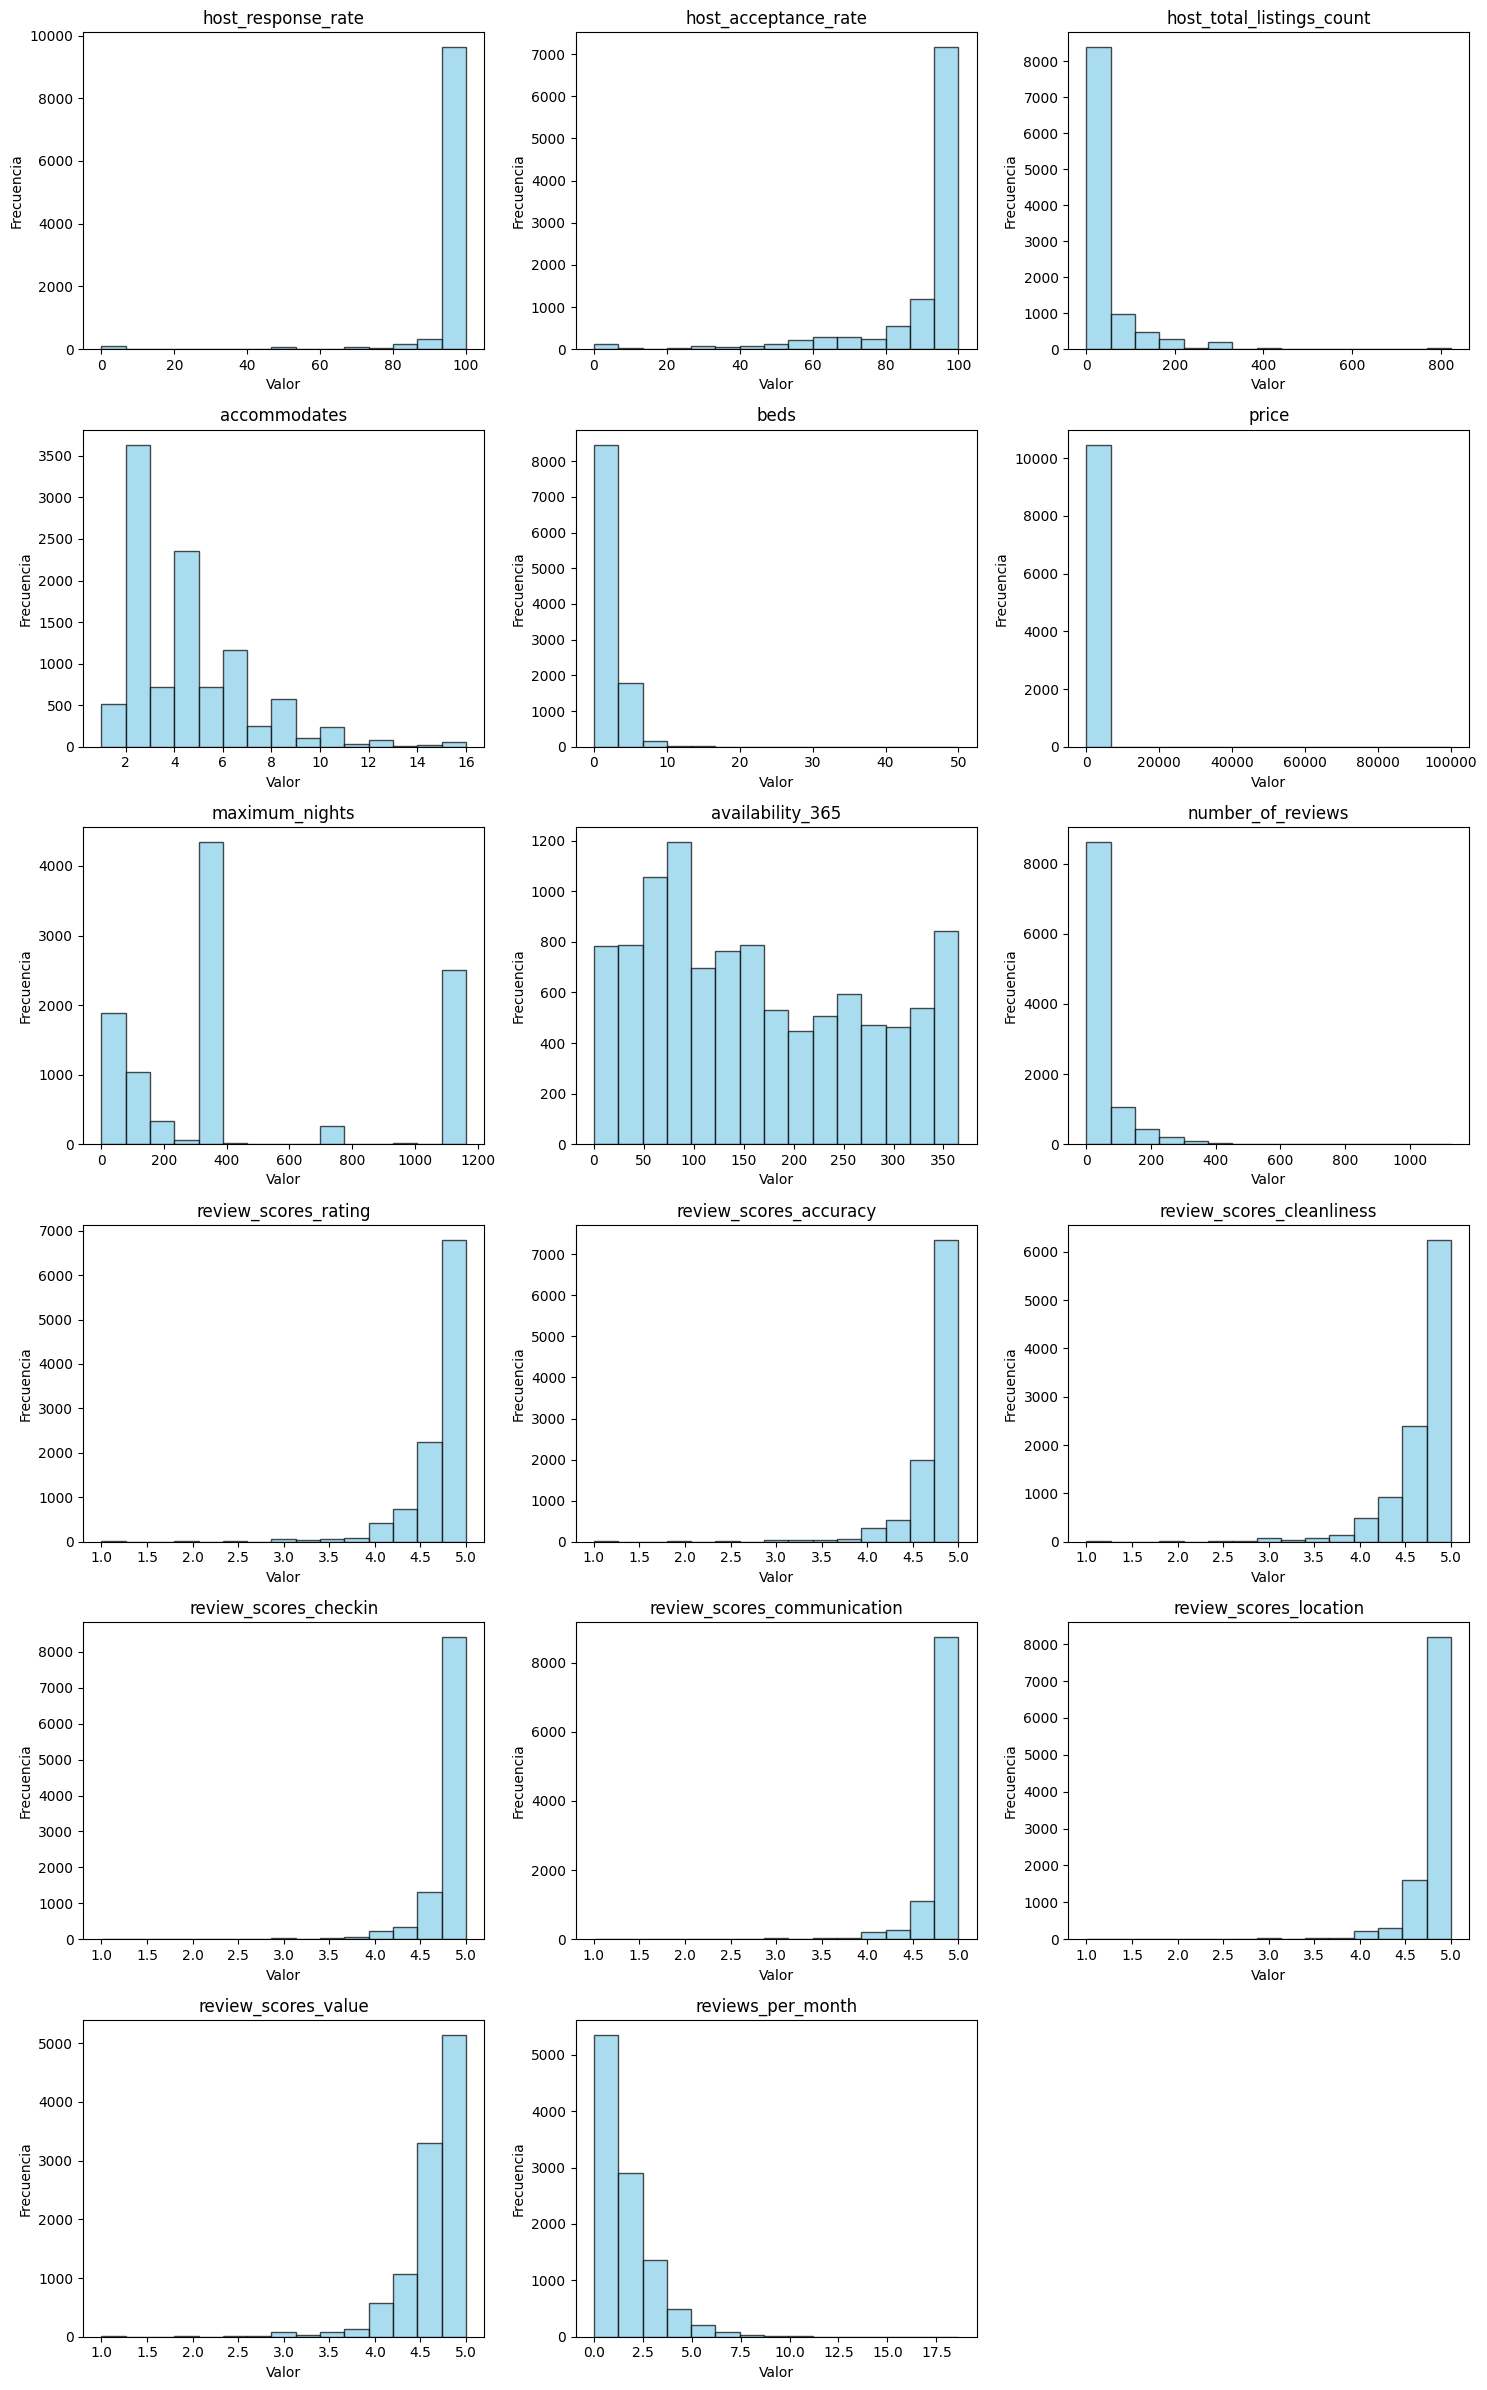

In [15]:
import matplotlib.pyplot as plt

# Crear histogramas para cada variable numérica usando el número de bins obtenido
# Ajustamos el número de subplots en función de la cantidad de columnas numéricas
n_cols = 3
n_rows = int(np.ceil(len(df_num.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    df_num[col].plot(kind="hist", bins=num_bins, ax=axes[i], alpha=0.7,
                     color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].set_xlabel("Valor")

# Si quedan subplots vacíos, los eliminamos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
